In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_csv("DataSet/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: xlabel='Species', ylabel='Count'>

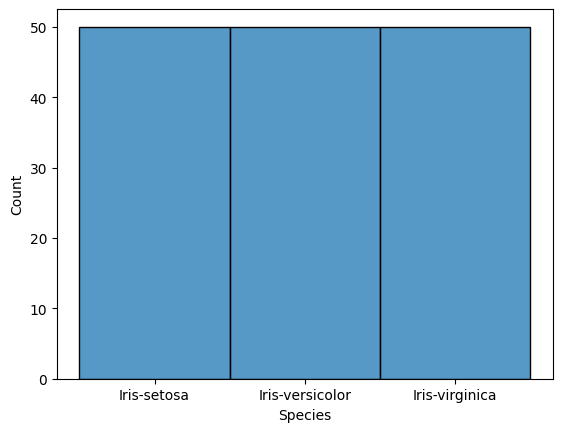

In [143]:
sns.histplot(data=df, x="Species")

<Axes: xlabel='Species', ylabel='Count'>

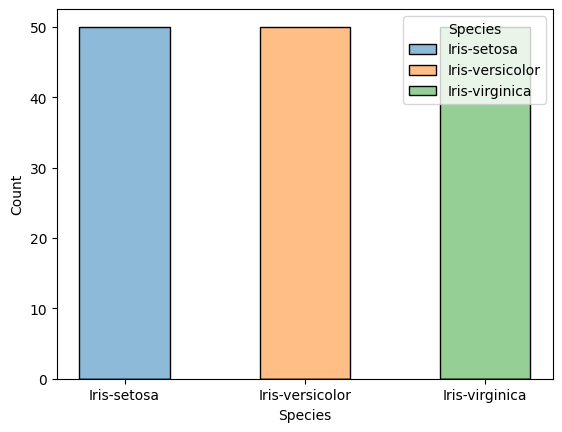

In [144]:
sns.histplot(data=df, x="Species", hue="Species", shrink=.5)

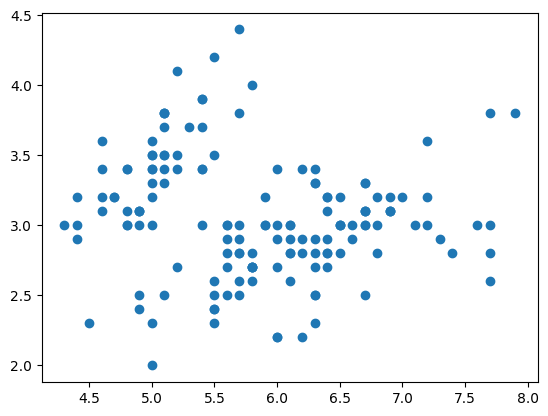

In [145]:
plt.scatter(df.SepalLengthCm, df.SepalWidthCm)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

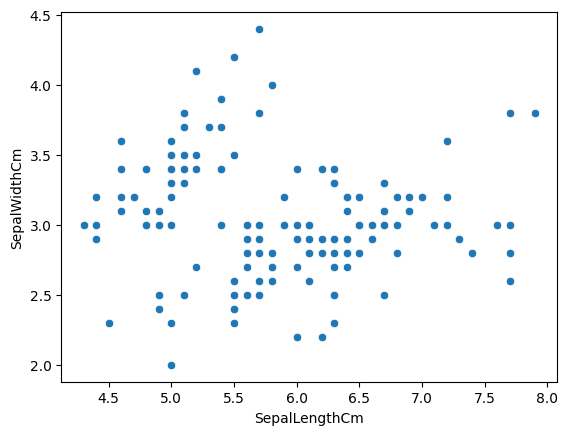

In [146]:
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm")

Text(0.5, 1.0, 'Iris dataset: Sepal')

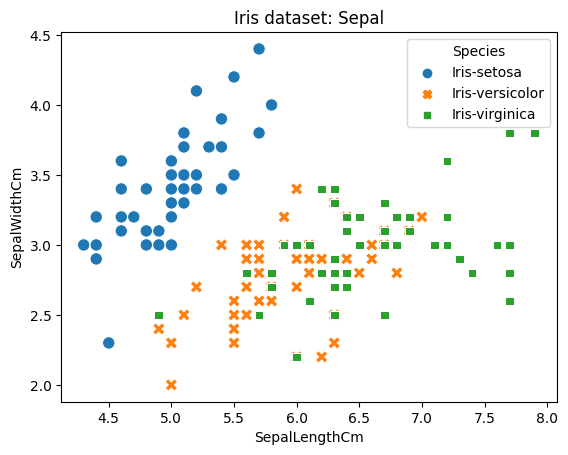

In [147]:
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm",
                hue="Species", style="Species", s=80)
plt.title("Iris dataset: Sepal")

Text(0.5, 1.0, 'Iris dataset: Petal')

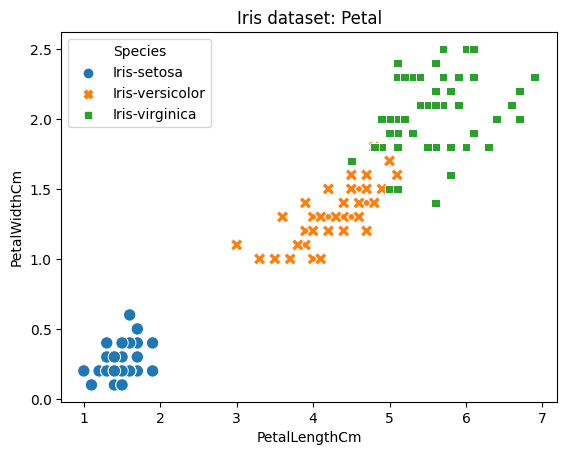

In [148]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm",
                hue="Species", style="Species", s=80)
plt.title("Iris dataset: Petal")

<h3>KDE</h3>

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

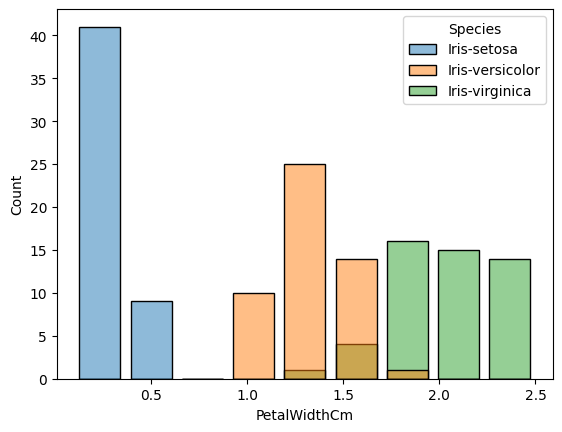

In [149]:
sns.histplot(data=df, x="PetalWidthCm", hue="Species", shrink=.8)

C:\Users\Two\AppData\Local\Temp\ipykernel_7000\3114856348.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="PetalWidthCm", hue="Species", shade=True)


<Axes: xlabel='PetalWidthCm', ylabel='Density'>

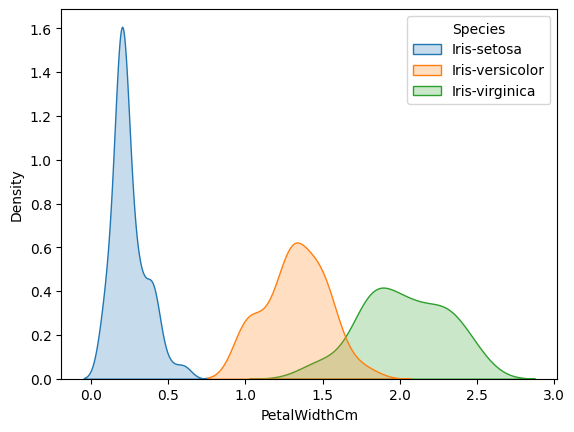

In [150]:
sns.kdeplot(data=df, x="PetalWidthCm", hue="Species", shade=True)

C:\Users\Two\AppData\Local\Temp\ipykernel_7000\2704125647.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="SepalWidthCm", hue="Species", shade=True)


<Axes: xlabel='SepalWidthCm', ylabel='Density'>

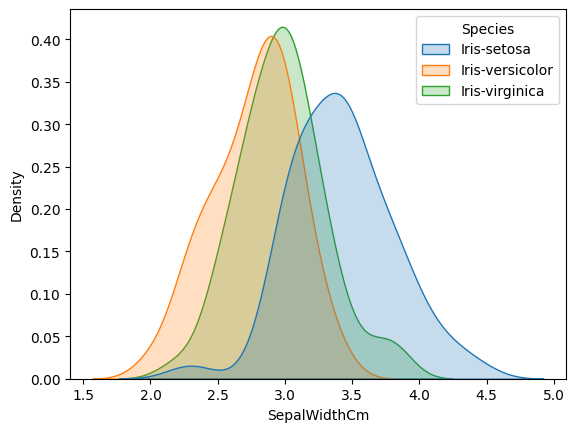

In [151]:
sns.kdeplot(data=df, x="SepalWidthCm", hue="Species", shade=True)

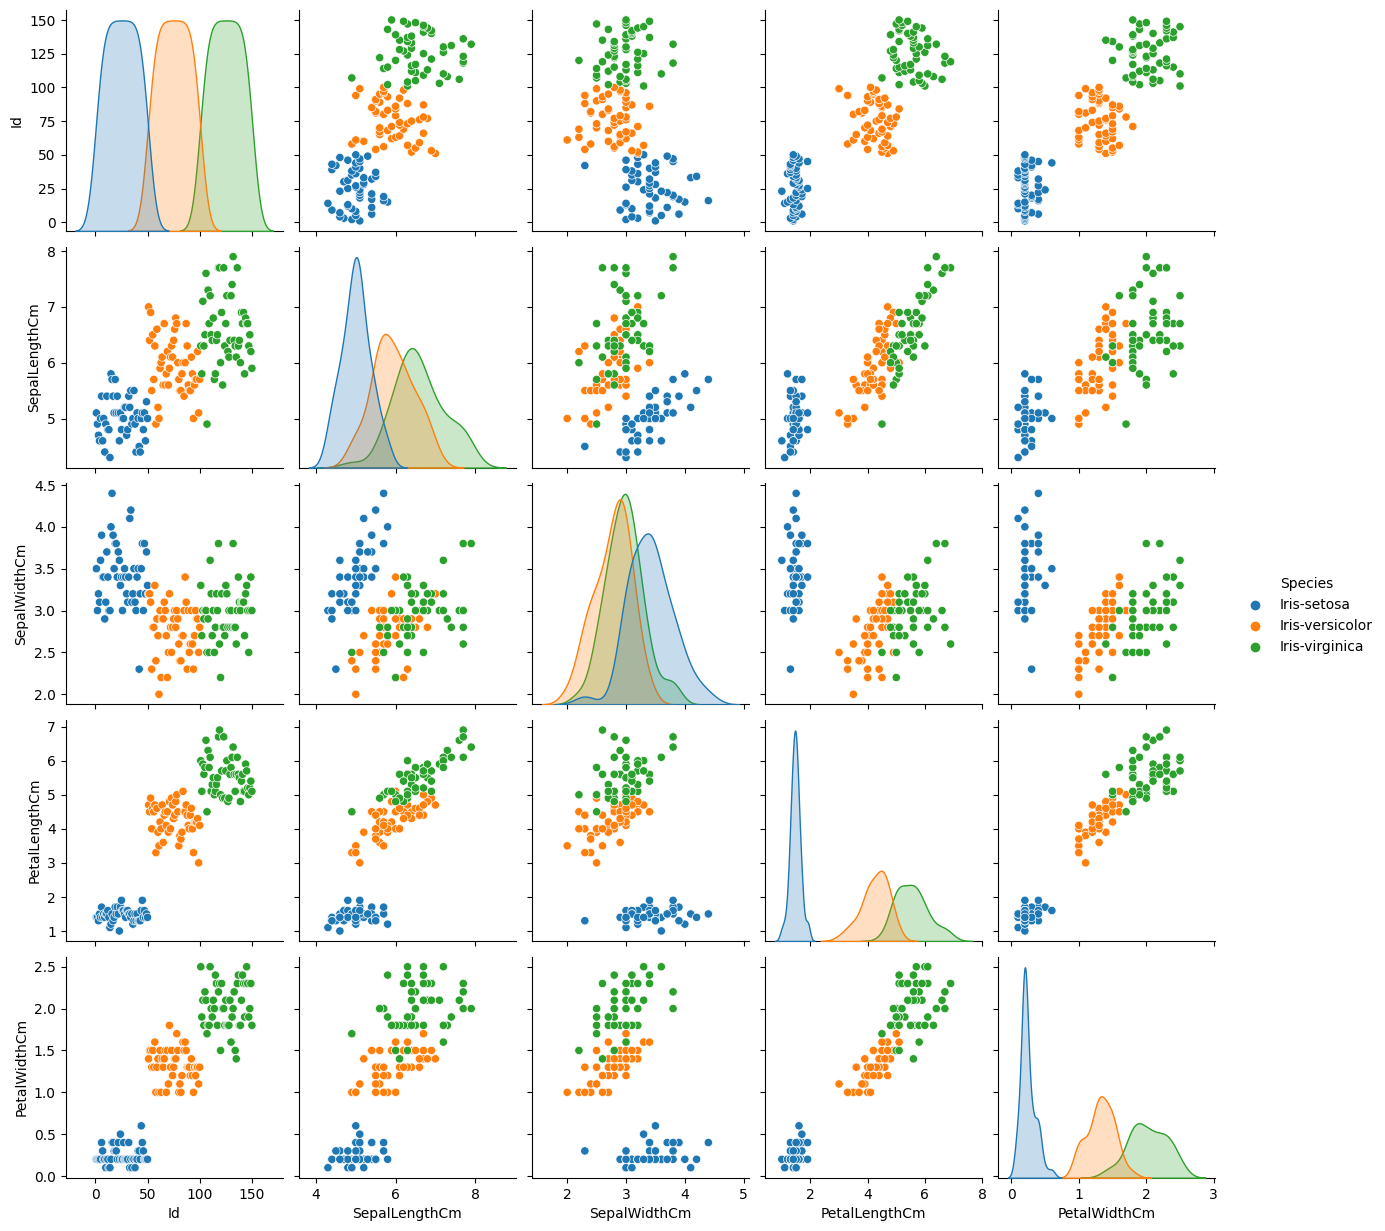

In [152]:
sns.pairplot(df, hue="Species")

In [153]:
x = df.drop(["Species"], axis=1)
x[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [154]:
y =df.Species
y[:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

<h3>Encoding</h3>

In [155]:
y, class_name = pd.factorize(df.Species)
class_name

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [156]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [157]:
x_train.shape, x_test.shape

((105, 5), (45, 5))

In [158]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [159]:
model.feature_importances_

array([0.50767263, 0.        , 0.        , 0.        , 0.49232737])

In [160]:
y_predict = model.predict(x_test)
print(y_predict)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2]


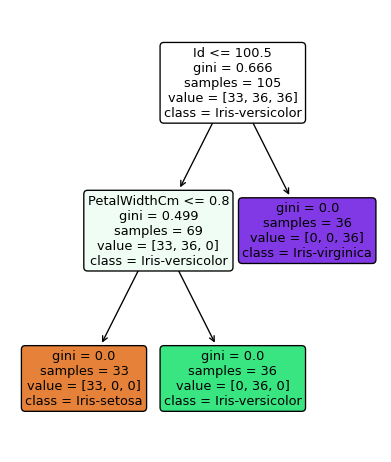

In [161]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data_feature_names = x.columns

plt.subplots(nrows=1, ncols=1, figsize=(5, 6), dpi=96)
plot_tree(model, filled=True, rounded=True, feature_names=data_feature_names, class_names=class_name)

plt.show()

In [162]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [163]:
print(classification_report(y_test, y_predict, target_names=class_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Text(0.5, 1.0, 'Confusion Matrix')

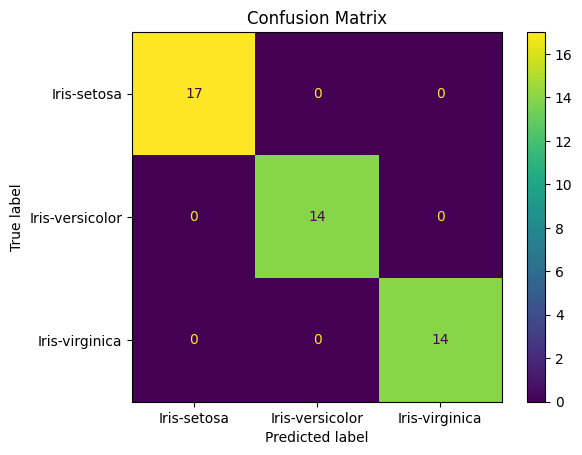

In [164]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_name).plot()
plt.title("Confusion Matrix")

<h3>PCA</h3>

In [165]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_pca = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=20)

In [166]:
x_train.shape, x_test.shape

((105, 2), (45, 2))

In [167]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(x_train, y_train)

SVC(kernel='linear')

In [168]:
y_pred = model.predict(x_test)
print("Score : {}".format(accuracy_score(y_test, y_pred)))

Score : 1.0


Text(0.5, 1.0, 'Confusion Matrix')

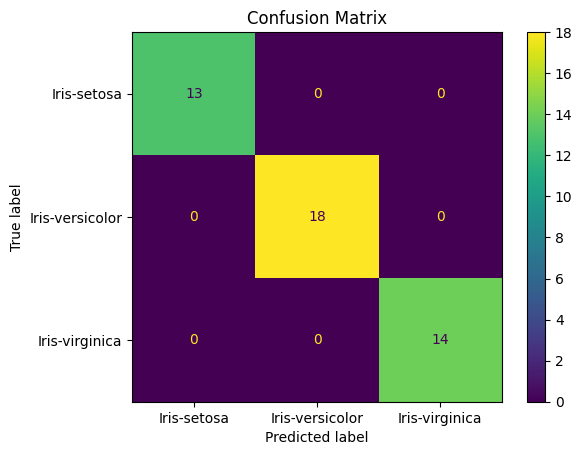

In [169]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_name).plot()
plt.title("Confusion Matrix")

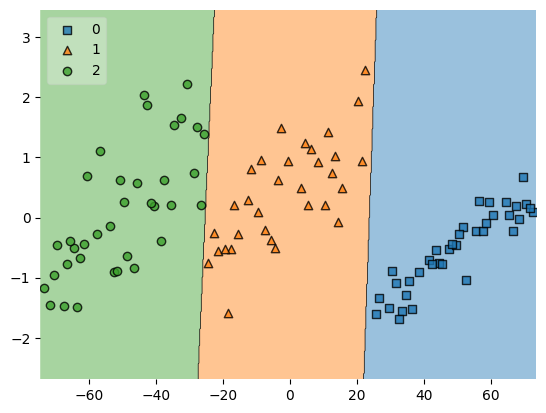

In [170]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(x_train), y_train,
                           clf=model, legend=2)

handles, labels = ax.get_legend_handles_labels()